# Test Pretrained Models

This notebook loads pretrained models from a selected folder and tests them against a dataset.

## Steps:
1. Select a training session folder
2. Load models and scaler
3. Load test dataset
4. Evaluate models
5. Display results

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_preparation import prepare_data

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. List Available Training Sessions

In [5]:
# Get all training sessions
models_base = 'models'
sessions = sorted([d for d in os.listdir(models_base) 
                   if os.path.isdir(os.path.join(models_base, d))],
                  reverse=True)

print(f"Found {len(sessions)} training session(s):\n")
for i, session in enumerate(sessions[:10], 1):  # Show last 10 sessions
    session_path = os.path.join(models_base, session)
    
    # Try to read config file
    config_path = os.path.join(session_path, 'training_config.txt')
    if os.path.exists(config_path):
        with open(config_path, 'r') as f:
            lines = f.readlines()
            # Extract best model info
            best_model = "N/A"
            best_acc = "N/A"
            for line in lines:
                if "Best Model:" in line:
                    best_model = line.split(":")[1].strip()
                if "Best Accuracy:" in line:
                    best_acc = line.split(":")[1].strip()
        print(f"{i}. {session}")
        print(f"   Best Model: {best_model}, Accuracy: {best_acc}\n")
    else:
        print(f"{i}. {session}\n")

Found 2 training session(s):

1. 2025-10-24_14-49-56
   Best Model: naive_bayes, Accuracy: 0.9548

2. 2025-10-24_14-16-09
   Best Model: naive_bayes, Accuracy: 0.9548



## 3. Select Training Session

Choose which training session to load (default: latest)

In [7]:
# Select session (change this to select a different session)
# Option 1: Use latest session
selected_session = sessions[0]

# Option 2: Manually specify session
# selected_session = '2024-01-15_14-30-45'

session_path = os.path.join(models_base, selected_session)

print(f"Selected session: {selected_session}")
print(f"Session path: {session_path}")

# Display training configuration
config_path = os.path.join(session_path, 'training_config.txt')
if os.path.exists(config_path):
    print("\n" + "="*80)
    print("TRAINING CONFIGURATION")
    print("="*80)
    with open(config_path, 'r') as f:
        print(f.read())

Selected session: 2025-10-24_14-49-56
Session path: models\2025-10-24_14-49-56

TRAINING CONFIGURATION
Training Configuration
Timestamp: 2025-10-24_14-49-56
Target Bars: 45
Target Percentage: 3.0%
SMOTE Enabled: True
GPU Enabled: False
CPU Cores: -1
Dataset Shape: (1023507, 5)
Class Imbalance Ratio: 238.98:1

Training Summary
Total Models Trained: 13
Best Model: naive_bayes
Best Accuracy: 0.9548
Total Training Time: 20.63s (0.34min)
Average Time per Model: 1.59s



## 4. Load Models and Scaler

In [9]:
# Load scaler
scaler_path = os.path.join(session_path, 'scaler.joblib')
scaler = joblib.load(scaler_path)
print(f"✓ Scaler loaded from: {scaler_path}")

# Load all models
models = {}
for file in os.listdir(session_path):
    if file.endswith('.joblib') and file != 'scaler.joblib' and not file.endswith('_best.joblib'):
        model_name = file.replace('.joblib', '')
        model_path = os.path.join(session_path, file)
        models[model_name] = joblib.load(model_path)
        print(f"✓ Loaded: {model_name}")

print(f"\nTotal models loaded: {len(models)}")

✓ Scaler loaded from: models\2025-10-24_14-49-56\scaler.joblib
✓ Loaded: decision_tree


C:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.7.2 when using version 1.5.1. This might lead to breaking code or inval

✓ Loaded: lightgbm
✓ Loaded: logistic_regression
✓ Loaded: naive_bayes


C:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.7.2 when using version 1.5.1. This might lead to breaking c

✓ Loaded: random_forest
✓ Loaded: ridge_classifier
✓ Loaded: xgboost

Total models loaded: 7


C:\tools\Anaconda3\Lib\pickle.py:1759: UserWarning: [15:46:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\data\../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)


## 5. Load Test Dataset

Specify your test dataset path

In [11]:
# Load test data
# Change this to your test dataset path
test_data_path = 'data/btc_2023.csv'

print(f"Loading test data from: {test_data_path}")
df_test = pd.read_csv(test_data_path)

print(f"✓ Test data loaded")
print(f"  Shape: {df_test.shape}")
print(f"  Date range: {df_test['Timestamp'].min()} to {df_test['Timestamp'].max()}")

# Display first few rows
df_test.head()

Loading test data from: data/btc_2023.csv
✓ Test data loaded
  Shape: (420657, 5)
  Date range: 2023-01-01 00:00:00 to 2023-06-01 00:00:00


,Timestamp,Open,High,Low,Close
0,2023-01-01 00:00:00,16530.0,16532.0,16530.0,16532.0
1,2023-01-01 00:00:00,16530.0,16532.0,16530.0,16532.0
2,2023-01-01 00:01:00,16532.0,16532.0,16529.0,16529.0
3,2023-01-01 00:02:00,16528.0,16528.0,16528.0,16528.0
4,2023-01-01 00:03:00,16528.0,16528.0,16525.0,16525.0


## 6. Prepare Test Data

In [13]:
# Prepare features and target
# Use same parameters as training (adjust if needed)
target_bars = 45
target_pct = 3.0

print(f"Preparing test data with target_bars={target_bars}, target_pct={target_pct}%")
X_test, y_test = prepare_data(df_test, target_bars=target_bars, target_pct=target_pct)

print(f"✓ Test data prepared")
print(f"  Features shape: {X_test.shape}")
print(f"  Target shape: {y_test.shape}")

# Display class distribution
print(f"\nTarget distribution:")
print(y_test.value_counts())
print(f"\nClass balance:")
print(y_test.value_counts(normalize=True))

Preparing test data with target_bars=45, target_pct=3.0%
✓ Test data prepared
  Features shape: (420612, 5)
  Target shape: (420612,)

Target distribution:
target
0    419463
1      1149
Name: count, dtype: int64

Class balance:
target
0    0.997268
1    0.002732
Name: proportion, dtype: float64


## 7. Scale Test Data

In [15]:
# Scale features using loaded scaler
X_test_scaled = scaler.transform(X_test)

print(f"✓ Test data scaled")
print(f"  Scaled features shape: {X_test_scaled.shape}")
print(f"  Min value: {X_test_scaled.min():.4f}")
print(f"  Max value: {X_test_scaled.max():.4f}")

✓ Test data scaled
  Scaled features shape: (420612, 5)
  Min value: 0.0000
  Max value: 1.0000


## 8. Evaluate All Models

In [20]:
# Evaluate each model
results = []

print("="*80)
print("EVALUATING MODELS ON TEST SET")
print("="*80)

for model_name, model in models.items():
    try:
        print(f"\nEvaluating: {model_name}...")
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Get prediction probabilities if available
        try:
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        except:
            roc_auc = np.nan
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'F1_Score': f1,
            'Precision': precision,
            'Recall': recall,
            'ROC_AUC': roc_auc
        })
        
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1 Score: {f1:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        if not np.isnan(roc_auc):
            print(f"  ROC AUC: {roc_auc:.4f}")
    except Exception as e:
        print(f'Error [{e}] with {model_name}')

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1_Score', ascending=False)

print("\n" + "="*80)
print("TEST RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1_Score']
print(f"\n✓ Best Model: {best_model_name} (F1 Score: {best_f1:.4f})")

EVALUATING MODELS ON TEST SET

Evaluating: decision_tree...
  Accuracy: 0.8811
  F1 Score: 0.0051
  Precision: 0.0026
  Recall: 0.1105
  ROC AUC: 0.5000

Evaluating: lightgbm...
  Accuracy: 0.8811
  F1 Score: 0.0051
  Precision: 0.0026
  Recall: 0.1105
  ROC AUC: 0.5000

Evaluating: logistic_regression...
  Accuracy: 0.8957
  F1 Score: 0.0046
  Precision: 0.0024
  Recall: 0.0879
  ROC AUC: 0.4917

Evaluating: naive_bayes...
  Accuracy: 0.0513
  F1 Score: 0.0054
  Precision: 0.0027
  Recall: 0.9478
  ROC AUC: 0.4911

Evaluating: random_forest...
  Accuracy: 0.8700
  F1 Score: 0.0051
  Precision: 0.0026
  Recall: 0.1227
  ROC AUC: 0.5000

Evaluating: ridge_classifier...
Error [tuple index out of range] with ridge_classifier

Evaluating: xgboost...
  Accuracy: 0.8811
  F1 Score: 0.0051
  Precision: 0.0026
  Recall: 0.1105
  ROC AUC: 0.5000

TEST RESULTS SUMMARY
              Model  Accuracy  F1_Score  Precision   Recall  ROC_AUC
        naive_bayes  0.051261  0.005428   0.002722 0.947781 

## 9. Visualize Results

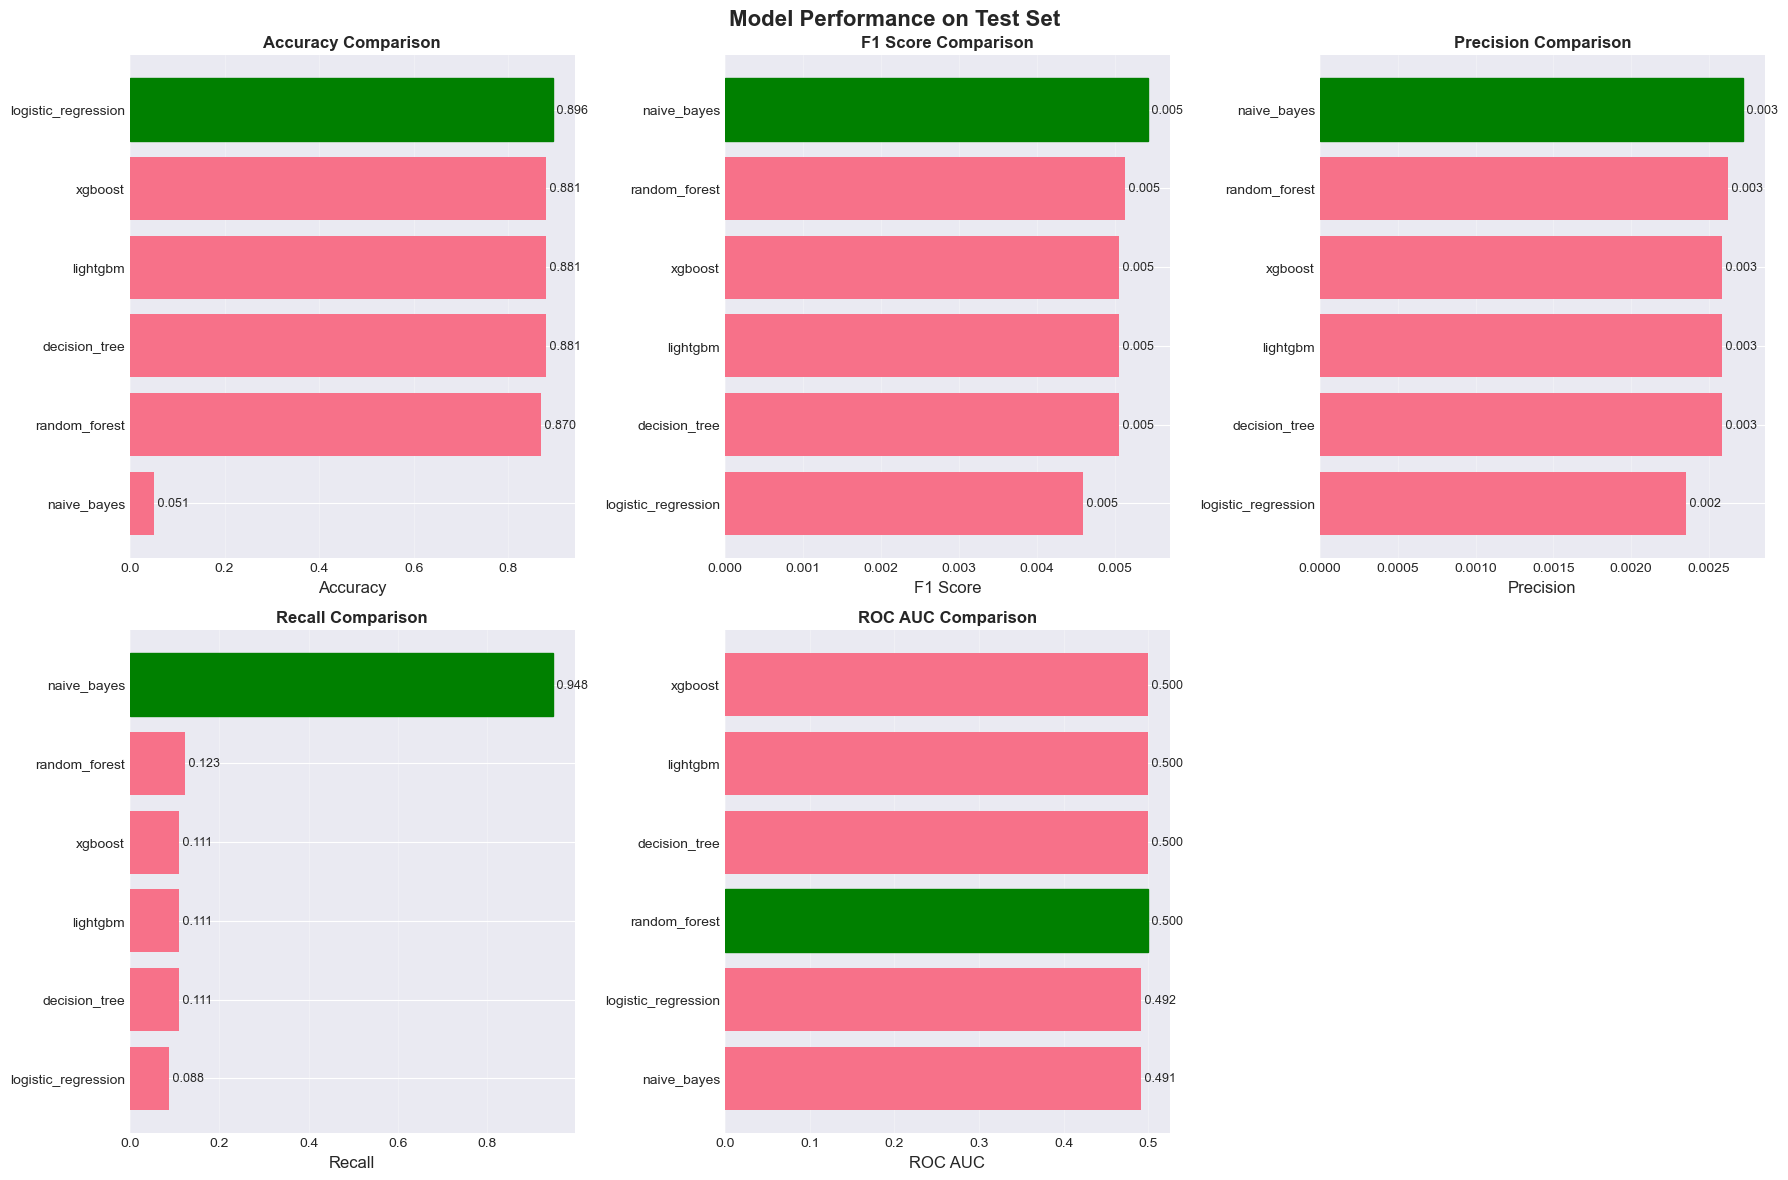

✓ Visualization complete


In [22]:
# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance on Test Set', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'F1_Score', 'Precision', 'Recall', 'ROC_AUC']
titles = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 3, idx % 3]
    
    # Sort by metric
    sorted_df = results_df.sort_values(metric, ascending=True)
    
    # Create bar plot
    bars = ax.barh(sorted_df['Model'], sorted_df[metric])
    
    # Color best model differently
    best_idx = sorted_df[metric].idxmax()
    bars[list(sorted_df.index).index(best_idx)].set_color('green')
    
    ax.set_xlabel(title, fontsize=12)
    ax.set_title(f'{title} Comparison', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (idx, row) in enumerate(sorted_df.iterrows()):
        value = row[metric]
        if not np.isnan(value):
            ax.text(value, i, f' {value:.3f}', va='center', fontsize=9)

# Remove empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✓ Visualization complete")

## 10. Detailed Analysis of Best Model

DETAILED ANALYSIS: NAIVE_BAYES

Classification Report:
              precision    recall  f1-score   support

 No Increase       1.00      0.05      0.09    419463
    Increase       0.00      0.95      0.01      1149

    accuracy                           0.05    420612
   macro avg       0.50      0.50      0.05    420612
weighted avg       0.99      0.05      0.09    420612



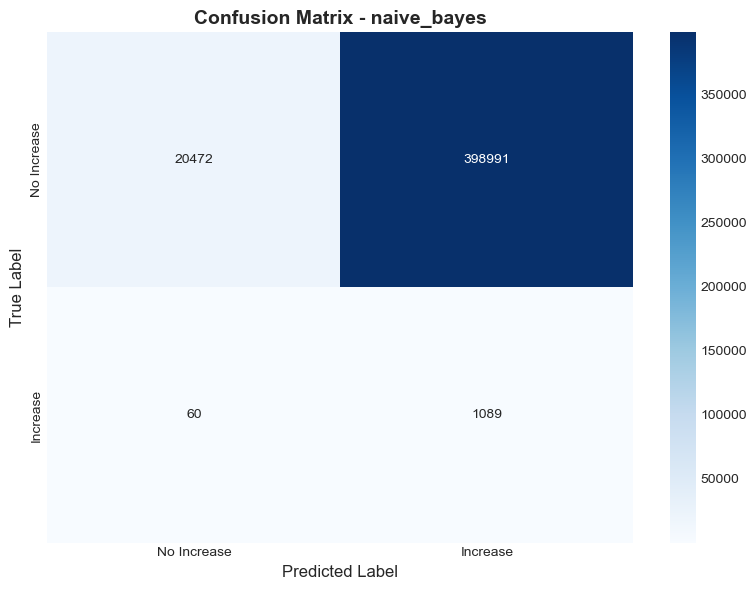


Confusion Matrix Breakdown:
  True Negatives:  20,472
  False Positives: 398,991
  False Negatives: 60
  True Positives:  1,089

Additional Metrics:
  Specificity: 0.0488
  Sensitivity (Recall): 0.9478
  False Positive Rate: 0.9512
  False Negative Rate: 0.0522


In [24]:
# Get best model
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

print("="*80)
print(f"DETAILED ANALYSIS: {best_model_name.upper()}")
print("="*80)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Increase', 'Increase']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Increase', 'Increase'],
            yticklabels=['No Increase', 'Increase'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives:  {tn:,}")
print(f"  False Positives: {fp:,}")
print(f"  False Negatives: {fn:,}")
print(f"  True Positives:  {tp:,}")

print(f"\nAdditional Metrics:")
print(f"  Specificity: {tn / (tn + fp):.4f}")
print(f"  Sensitivity (Recall): {tp / (tp + fn):.4f}")
print(f"  False Positive Rate: {fp / (fp + tn):.4f}")
print(f"  False Negative Rate: {fn / (fn + tp):.4f}")

## 11. Compare Training vs Test Performance

TRAINING vs TEST PERFORMANCE
              Model  Accuracy_Train  F1_Score_Train  Accuracy_Test  F1_Score_Test
        naive_bayes        0.954793        0.008571       0.051261       0.005428
            xgboost        0.876591        0.008400       0.881088       0.005053
      decision_tree        0.876591        0.008400       0.881088       0.005053
           lightgbm        0.876591        0.008400       0.881088       0.005053
      random_forest        0.005481        0.008310       0.870025       0.005132
logistic_regression        0.004167        0.008299       0.895709       0.004584

PERFORMANCE DROP (Training - Test)
              Model  Accuracy_Drop  F1_Drop
        naive_bayes       0.903532 0.003142
            xgboost      -0.004496 0.003347
      decision_tree      -0.004496 0.003347
           lightgbm      -0.004496 0.003347
      random_forest      -0.864544 0.003179
logistic_regression      -0.891542 0.003716


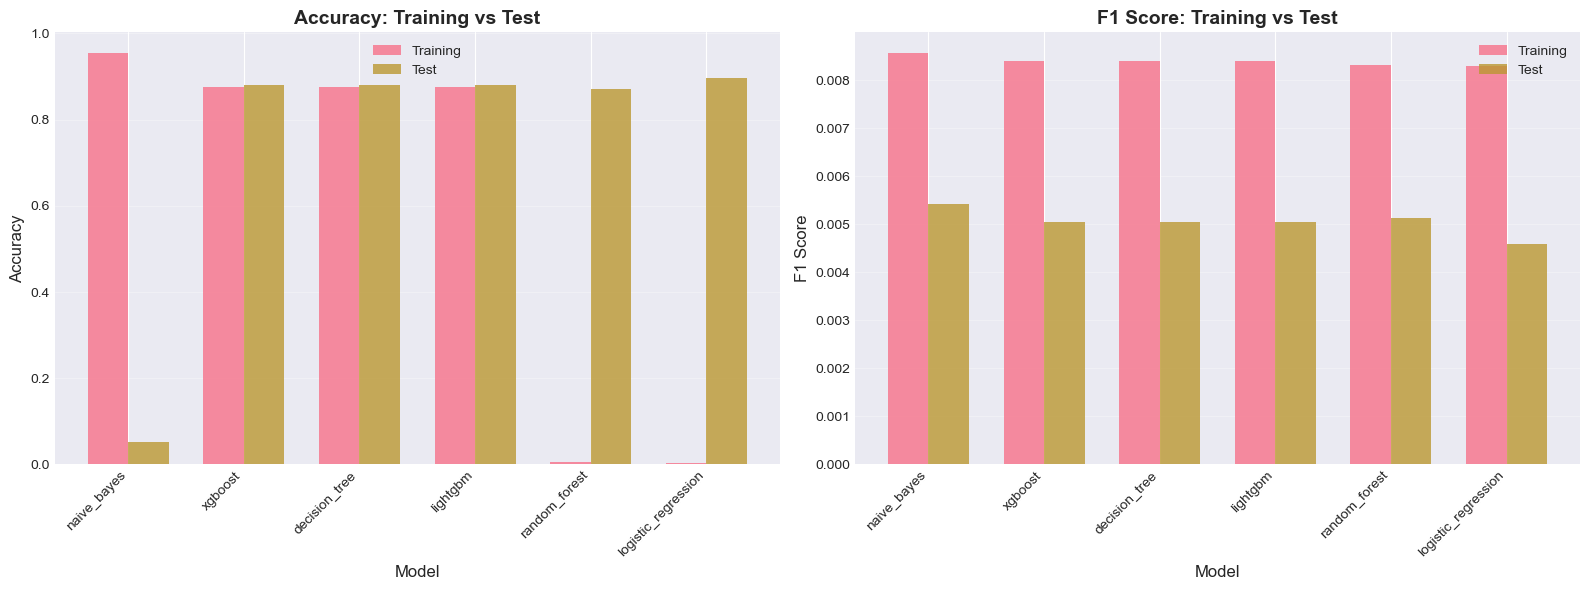


✓ Comparison complete


In [26]:
# Load training results
training_csv_path = os.path.join(session_path, 'training_results_summary.csv')

if os.path.exists(training_csv_path):
    training_results = pd.read_csv(training_csv_path)
    
    # Filter out summary rows
    training_results = training_results[~training_results['Model'].str.contains('SUMMARY|Best Model|Total|Average', na=False)]
    
    # Merge with test results
    comparison = training_results[['Model', 'Accuracy', 'F1_Score']].merge(
        results_df[['Model', 'Accuracy', 'F1_Score']],
        on='Model',
        suffixes=('_Train', '_Test')
    )
    
    print("="*80)
    print("TRAINING vs TEST PERFORMANCE")
    print("="*80)
    print(comparison.to_string(index=False))
    
    # Calculate performance drop
    comparison['Accuracy_Drop'] = comparison['Accuracy_Train'] - comparison['Accuracy_Test']
    comparison['F1_Drop'] = comparison['F1_Score_Train'] - comparison['F1_Score_Test']
    
    print("\n" + "="*80)
    print("PERFORMANCE DROP (Training - Test)")
    print("="*80)
    print(comparison[['Model', 'Accuracy_Drop', 'F1_Drop']].to_string(index=False))
    
    # Visualize comparison
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Accuracy comparison
    x = np.arange(len(comparison))
    width = 0.35
    
    axes[0].bar(x - width/2, comparison['Accuracy_Train'], width, label='Training', alpha=0.8)
    axes[0].bar(x + width/2, comparison['Accuracy_Test'], width, label='Test', alpha=0.8)
    axes[0].set_xlabel('Model', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].set_title('Accuracy: Training vs Test', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(comparison['Model'], rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # F1 Score comparison
    axes[1].bar(x - width/2, comparison['F1_Score_Train'], width, label='Training', alpha=0.8)
    axes[1].bar(x + width/2, comparison['F1_Score_Test'], width, label='Test', alpha=0.8)
    axes[1].set_xlabel('Model', fontsize=12)
    axes[1].set_ylabel('F1 Score', fontsize=12)
    axes[1].set_title('F1 Score: Training vs Test', fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(comparison['Model'], rotation=45, ha='right')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Comparison complete")
else:
    print("Training results CSV not found. Skipping comparison.")

## 12. Save Test Results

In [28]:
# Save test results to session directory
test_results_path = os.path.join(session_path, 'test_results.csv')
results_df.to_csv(test_results_path, index=False)

print(f"✓ Test results saved to: {test_results_path}")

# Save detailed report
report_path = os.path.join(session_path, 'test_report.txt')
with open(report_path, 'w') as f:
    f.write("TEST RESULTS REPORT\n")
    f.write("="*80 + "\n\n")
    f.write(f"Training Session: {selected_session}\n")
    f.write(f"Test Dataset: {test_data_path}\n")
    f.write(f"Test Set Size: {len(y_test)}\n")
    f.write(f"Target Bars: {target_bars}\n")
    f.write(f"Target Percentage: {target_pct}%\n\n")
    
    f.write("Test Results Summary:\n")
    f.write("="*80 + "\n")
    f.write(results_df.to_string(index=False))
    f.write("\n\n")
    
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Best F1 Score: {best_f1:.4f}\n\n")
    
    f.write("Classification Report (Best Model):\n")
    f.write("="*80 + "\n")
    f.write(classification_report(y_test, y_pred_best, target_names=['No Increase', 'Increase']))

print(f"✓ Test report saved to: {report_path}")
print("\n" + "="*80)
print("TESTING COMPLETE")
print("="*80)

✓ Test results saved to: models\2025-10-24_14-49-56\test_results.csv
✓ Test report saved to: models\2025-10-24_14-49-56\test_report.txt

TESTING COMPLETE


## Summary

This notebook:
1. ✅ Listed available training sessions
2. ✅ Loaded pretrained models and scaler
3. ✅ Loaded and prepared test dataset
4. ✅ Evaluated all models on test set
5. ✅ Visualized performance metrics
6. ✅ Analyzed best model in detail
7. ✅ Compared training vs test performance
8. ✅ Saved test results

### Next Steps:
- Review test results and identify best performing model
- Compare with training performance to check for overfitting
- Use best model for backtesting or live trading
- Retrain if test performance is significantly lower than training